In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__(self,in_features=10,h1=64,h2=32,out_features=2):
    super(Model,self).__init__()
    self.layers=nn.Sequential(
                              nn.Linear(in_features,h1),
                              nn.ReLU(),
                              nn.Dropout(p=0.3),
                              nn.Linear(h1,h2),
                              nn.ReLU(),
                              nn.Dropout(p=0.3),
                              nn.Linear(h2,out_features),
                              nn.ReLU(),
                              )
  def forward(self,x):
    x=self.layers(x)
    return x

In [3]:
torch.manual_seed(41)
model=Model()

In [4]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1667, -0.1729,  0.1901, -0.2092, -0.1487,  0.1720, -0.2352,  0.1551,
          0.1926,  0.0858],
        [ 0.0567,  0.1222,  0.2392,  0.0257, -0.2277,  0.2918,  0.2319, -0.0073,
         -0.1849, -0.1225],
        [-0.2792,  0.2096, -0.0274,  0.2179,  0.1191, -0.0627, -0.2022,  0.1101,
         -0.2029, -0.0703],
        [ 0.1880, -0.1722, -0.0155, -0.0429,  0.0362,  0.3045,  0.1849, -0.1187,
          0.2798, -0.1028],
        [ 0.1303,  0.1309, -0.0096, -0.2943,  0.2973, -0.0730,  0.2154, -0.1897,
         -0.0323,  0.2711],
        [-0.2744,  0.0122, -0.0041, -0.2703, -0.0613, -0.2899,  0.0683,  0.0533,
          0.1809,  0.0079],
        [-0.1273, -0.1140, -0.1181,  0.2460,  0.1013, -0.3149,  0.0565, -0.0422,
          0.2307, -0.0925],
        [ 0.2760,  0.0977, -0.2849,  0.0665, -0.0722,  0.1583, -0.2714, -0.0231,
          0.2090,  0.1121],
        [ 0.1488,  0.2677,  0.1291,  0.1027,  0.0652,  0.0208,  0.2752, -0.0729,
          0.0416,  0.004

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/.config/cleaned_data (titanic).csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
X=X.values
y=y.values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [12]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [13]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0005)

In [16]:
epoch=400
losses=[]
for i in range(epoch):
  y_pred=model(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss.item():.4f}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:0.6152
Epoch:10 and loss:0.6101
Epoch:20 and loss:0.6068
Epoch:30 and loss:0.6222
Epoch:40 and loss:0.6083
Epoch:50 and loss:0.6091
Epoch:60 and loss:0.6085
Epoch:70 and loss:0.6059
Epoch:80 and loss:0.5984
Epoch:90 and loss:0.6045
Epoch:100 and loss:0.6169
Epoch:110 and loss:0.6119
Epoch:120 and loss:0.6088
Epoch:130 and loss:0.6051
Epoch:140 and loss:0.6096
Epoch:150 and loss:0.5929
Epoch:160 and loss:0.5836
Epoch:170 and loss:0.5961
Epoch:180 and loss:0.5889
Epoch:190 and loss:0.6043
Epoch:200 and loss:0.5848
Epoch:210 and loss:0.5867
Epoch:220 and loss:0.5833
Epoch:230 and loss:0.5953
Epoch:240 and loss:0.5907
Epoch:250 and loss:0.5818
Epoch:260 and loss:0.5868
Epoch:270 and loss:0.5850
Epoch:280 and loss:0.5867
Epoch:290 and loss:0.5785
Epoch:300 and loss:0.5908
Epoch:310 and loss:0.5739
Epoch:320 and loss:0.5738
Epoch:330 and loss:0.5574
Epoch:340 and loss:0.5764
Epoch:350 and loss:0.5752
Epoch:360 and loss:0.5666
Epoch:370 and loss:0.5677
Epoch:380 and loss:0.57

Text(0.5, 0, 'Epoch')

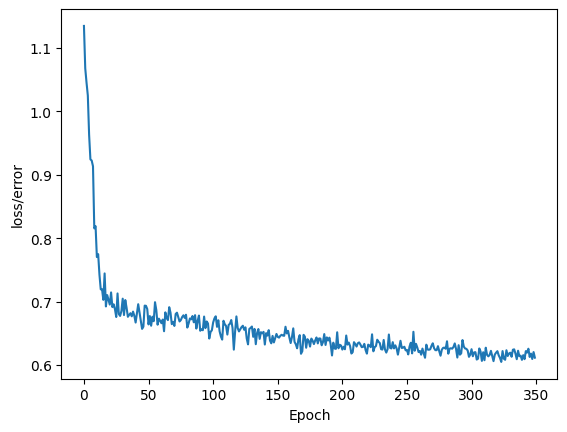

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')